# Normalisasi Data Training dan Testing Metode Z-Score (Standard Scaling)

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the datasets
data_testing = pd.read_csv('../../data_testing.csv')  # Replace with your testing file path
data_training = pd.read_csv('../../data_training.csv')  # Replace with your training file path

# Initialize the Standard Scaler (Z-Score Scaling)
scaler = StandardScaler()

# Identify columns to scale (exclude the 'Outcome' column)
columns_to_scale = [col for col in data_training.columns if col != 'Outcome']

# Create copies of the datasets for scaling
data_training_scaled = data_training.copy()
data_testing_scaled = data_testing.copy()

# Apply Z-Score Scaling
data_training_scaled[columns_to_scale] = scaler.fit_transform(data_training[columns_to_scale])
data_testing_scaled[columns_to_scale] = scaler.transform(data_testing[columns_to_scale])

# Separating features (X) and target (y) for both training and testing sets
X_train = data_training_scaled.drop(columns=['Outcome'])
y_train = data_training_scaled['Outcome']
X_test = data_testing_scaled.drop(columns=['Outcome'])
y_test = data_testing_scaled['Outcome']

print("Z-Score normalization completed. Scaled data is stored in 'data_training_scaled' and 'data_testing_scaled'.")


Z-Score normalization completed. Scaled data is stored in 'data_training_scaled' and 'data_testing_scaled'.


# Tampilkan Data Sebelum dan Sesudah Normalisasi

## Data Training

In [2]:
# Display original and normalized data for training dataset
print("Original Training Data (First 5 Rows):")
print(data_training.head())

print("\nNormalized Training Data (First 5 Rows):")
print(data_training_scaled.head())


Original Training Data (First 5 Rows):
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2       84              0              0        0   0.0   
1            9      112             82             24        0  28.2   
2            1      139             46             19       83  28.7   
3            0      161             50              0        0  21.9   
4            6      134             80             37      370  46.2   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.304   21        0  
1                     1.282   50        1  
2                     0.654   22        0  
3                     0.254   65        0  
4                     0.238   46        1  

Normalized Training Data (First 5 Rows):
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.526397 -1.151398      -3.752683      -1.322774 -0.701206 -4.135256   
1     1.588046 -0.276643       0.680345       0.233505 -0.701206 -

# Data Testing

In [3]:
# Display original and normalized data for testing dataset
print("\nOriginal Testing Data (First 5 Rows):")
print(data_testing.head())

print("\nNormalized Testing Data (First 5 Rows):")
print(data_testing_scaled.head())



Original Testing Data (First 5 Rows):
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6       98             58             33      190  34.0   
1            2      112             75             32        0  35.7   
2            2      108             64              0        0  30.8   
3            8      107             80              0        0  24.6   
4            7      136             90              0        0  29.9   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.430   43        0  
1                     0.148   21        0  
2                     0.158   21        0  
3                     0.856   34        0  
4                     0.210   50        0  

Normalized Testing Data (First 5 Rows):
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.681856 -0.714020      -0.617127       0.817110  0.934749  0.260736   
1    -0.526397 -0.276643       0.301916       0.752265 -0.701206  0

# Visualisasi Distribusi Kelas Target (Outcome) di Data Training

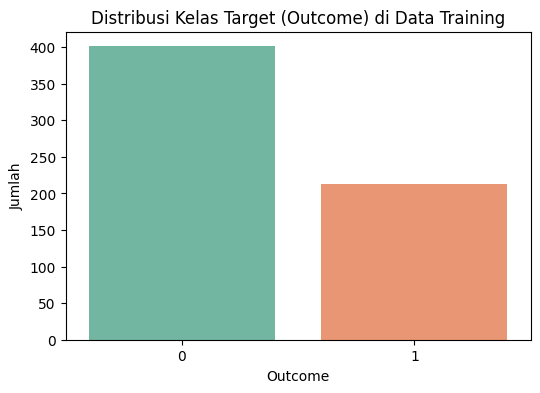

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi kelas target 'Outcome' di data training dengan warna yang berbeda
plt.figure(figsize=(6, 4))
sns.countplot(data=data_training, x='Outcome', hue='Outcome', palette='Set2', legend=False)
plt.title('Distribusi Kelas Target (Outcome) di Data Training')
plt.xlabel('Outcome')
plt.ylabel('Jumlah')
plt.show()


# Handling Imbalance Data Menggunakan SMOTE

In [5]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Inisialisasi objek SMOTE
smote = SMOTE(random_state=42)

# Lakukan SMOTE pada data pelatihan
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Menyimpan hasil resampling ke dalam DataFrame
data_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)
data_train_resampled['Outcome'] = y_train_resampled

# Menampilkan distribusi kelas sebelum dan sesudah SMOTE
print(f"Distribusi kelas asli pada y_train: \n{y_train.value_counts()}")
print(f"\nDistribusi kelas setelah SMOTE pada y_train: \n{pd.Series(y_train_resampled).value_counts()}")

# Menampilkan jumlah sampel sebelum dan sesudah SMOTE
print(f"\nJumlah sampel asli pada X_train: {X_train.shape[0]}")
print(f"Jumlah sampel setelah SMOTE pada X_train: {X_train_resampled.shape[0]}")


Distribusi kelas asli pada y_train: 
Outcome
0    401
1    213
Name: count, dtype: int64

Distribusi kelas setelah SMOTE pada y_train: 
Outcome
0    401
1    401
Name: count, dtype: int64

Jumlah sampel asli pada X_train: 614
Jumlah sampel setelah SMOTE pada X_train: 802


# Visualisasi Distribusi Kelas Target Sebelum dan Setelah SMOTE

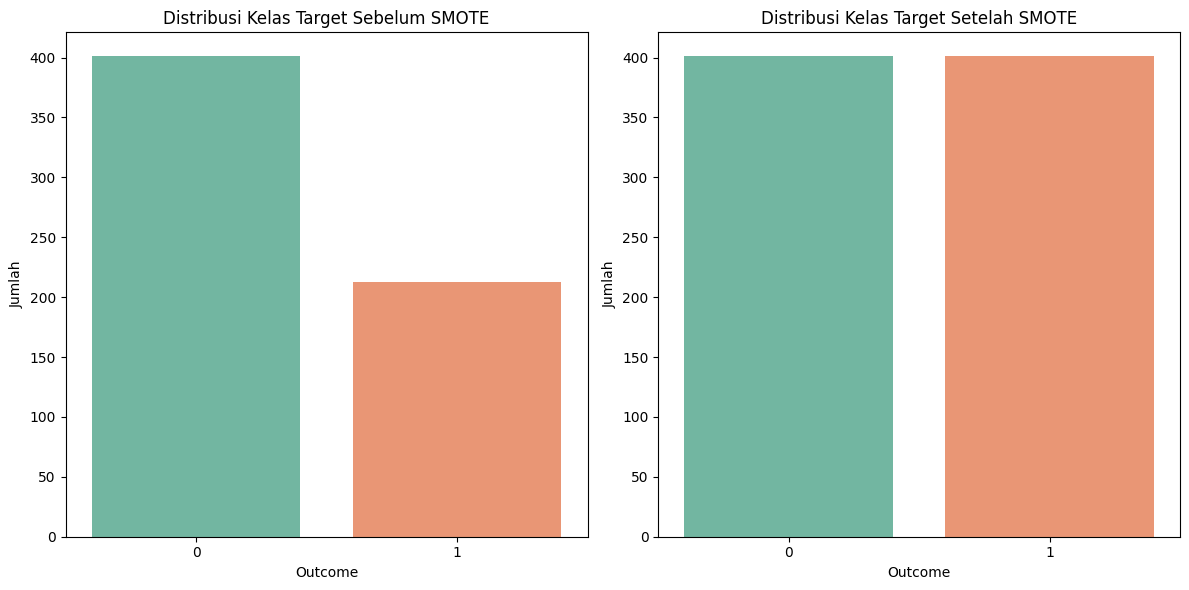

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Distribusi Kelas Target Sebelum dan Setelah SMOTE
plt.figure(figsize=(12, 6))

# Subplot 1: Sebelum SMOTE
plt.subplot(1, 2, 1)
sns.countplot(data=pd.DataFrame({'Outcome': y_train}), x='Outcome', hue='Outcome', palette='Set2', legend=False)
plt.title('Distribusi Kelas Target Sebelum SMOTE')
plt.xlabel('Outcome')
plt.ylabel('Jumlah')

# Subplot 2: Setelah SMOTE
plt.subplot(1, 2, 2)
sns.countplot(data=pd.DataFrame({'Outcome': y_train_resampled}), x='Outcome', hue='Outcome', palette='Set2', legend=False)
plt.title('Distribusi Kelas Target Setelah SMOTE')
plt.xlabel('Outcome')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()


# Latih Model KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Separate features and target variable from the resampled data (SMOTE)
X_train_resampled = data_train_resampled.drop(columns='Outcome')
y_train_resampled = data_train_resampled['Outcome']

# Define values of K
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

# Dictionary to store models and their classification reports
knn_models = {}
knn_reports = {}

# Train KNN models using the resampled data and store models
for k in k_values:
    # Initialize KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model on the resampled data
    knn.fit(X_train_resampled, y_train_resampled)
    
    # Store the trained model
    knn_models[k] = knn
    
    # Make predictions on the test set
    y_pred = knn.predict(X_test)
    
    # Generate and store classification report
    knn_reports[k] = classification_report(y_test, y_pred)

# Evaluasi Model

In [8]:
# Evaluate each model and print classification report
for k, knn in knn_models.items():
    # Predict on the test set
    y_pred = knn.predict(X_test)
    
    # Generate classification report
    report = classification_report(y_test, y_pred, target_names=["0", "1"])
    knn_reports[k] = report
    
    print(f"Classification Report for K={k}:\n")
    print(report)
    print("="*150)


Classification Report for K=1:

              precision    recall  f1-score   support

           0       0.71      0.68      0.69        99
           1       0.47      0.51      0.49        55

    accuracy                           0.62       154
   macro avg       0.59      0.59      0.59       154
weighted avg       0.62      0.62      0.62       154

Classification Report for K=3:

              precision    recall  f1-score   support

           0       0.80      0.70      0.75        99
           1       0.56      0.69      0.62        55

    accuracy                           0.69       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.72      0.69      0.70       154

Classification Report for K=5:

              precision    recall  f1-score   support

           0       0.79      0.67      0.72        99
           1       0.53      0.67      0.59        55

    accuracy                           0.67       154
   macro avg       0.66      0.6

# Visualisasi Akurasi Setiap Nilai K

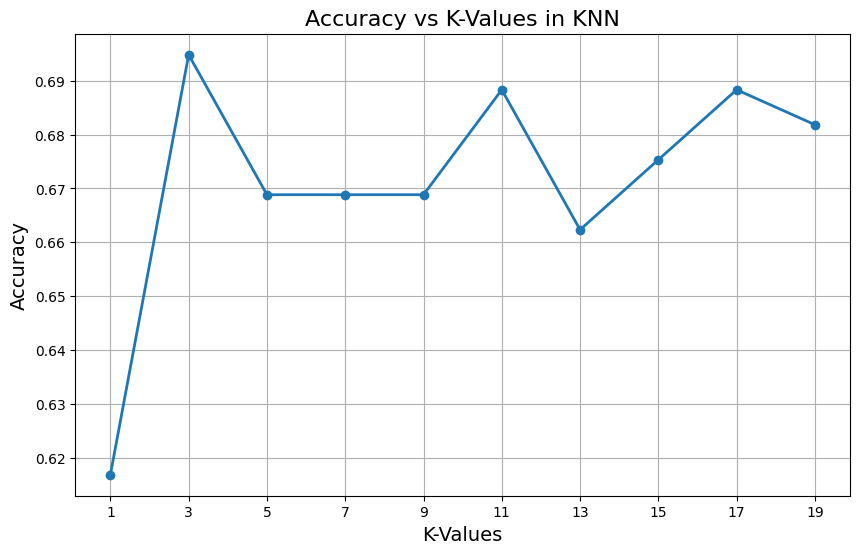

Accuracies for each K:
K = 1, Accuracy = 0.62
K = 3, Accuracy = 0.69
K = 5, Accuracy = 0.67
K = 7, Accuracy = 0.67
K = 9, Accuracy = 0.67
K = 11, Accuracy = 0.69
K = 13, Accuracy = 0.66
K = 15, Accuracy = 0.68
K = 17, Accuracy = 0.69
K = 19, Accuracy = 0.68


In [9]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Recalculate accuracies using the already trained models
knn_accuracies = {}

for k, knn in knn_models.items():
    # Calculate accuracy for each K value
    accuracy = accuracy_score(y_test, knn.predict(X_test))
    knn_accuracies[k] = accuracy

# Prepare data for visualization
k_values = list(knn_accuracies.keys())
accuracies = list(knn_accuracies.values())

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', linewidth=2)
plt.title('Accuracy vs K-Values in KNN', fontsize=16)
plt.xlabel('K-Values', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Display the list of accuracies
accuracy_list = [{"K": k, "Accuracy": acc} for k, acc in knn_accuracies.items()]
print("Accuracies for each K:")
for item in accuracy_list:
    print(f"K = {item['K']}, Accuracy = {item['Accuracy']:.2f}")


# Visualisasi Precision, Recall, and F1-Score Setiap Nilai K

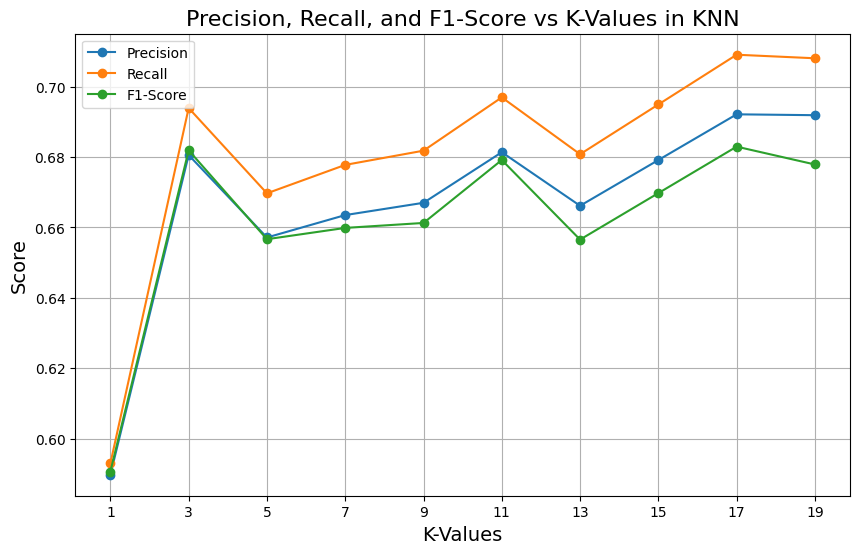

K = 1: Precision = 0.59, Recall = 0.59, F1-Score = 0.59
K = 3: Precision = 0.68, Recall = 0.69, F1-Score = 0.68
K = 5: Precision = 0.66, Recall = 0.67, F1-Score = 0.66
K = 7: Precision = 0.66, Recall = 0.68, F1-Score = 0.66
K = 9: Precision = 0.67, Recall = 0.68, F1-Score = 0.66
K = 11: Precision = 0.68, Recall = 0.70, F1-Score = 0.68
K = 13: Precision = 0.67, Recall = 0.68, F1-Score = 0.66
K = 15: Precision = 0.68, Recall = 0.69, F1-Score = 0.67
K = 17: Precision = 0.69, Recall = 0.71, F1-Score = 0.68
K = 19: Precision = 0.69, Recall = 0.71, F1-Score = 0.68


In [10]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Initialize dictionaries to store metrics
precision_results = {}
recall_results = {}
f1_score_results = {}

# Calculate metrics for each K value
for k, knn in knn_models.items():
    # Predict the outcomes
    y_pred = knn.predict(X_test)
    
    # Generate classification report as a dictionary
    report = classification_report(y_test, y_pred, output_dict=True)

    # # Store metrics for the positive class (label '1')
    # precision_results[k] = report['1']['precision']
    # recall_results[k] = report['1']['recall']
    # f1_score_results[k] = report['1']['f1-score']
    
    # Store metrics from macro avg
    precision_results[k] = report['macro avg']['precision']
    recall_results[k] = report['macro avg']['recall']
    f1_score_results[k] = report['macro avg']['f1-score']

# Visualize precision, recall, and f1-score
plt.figure(figsize=(10, 6))
plt.plot(precision_results.keys(), precision_results.values(), marker='o', label='Precision')
plt.plot(recall_results.keys(), recall_results.values(), marker='o', label='Recall')
plt.plot(f1_score_results.keys(), f1_score_results.values(), marker='o', label='F1-Score')
plt.title('Precision, Recall, and F1-Score vs K-Values in KNN', fontsize=16)
plt.xlabel('K-Values', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(list(precision_results.keys()))
plt.legend()
plt.grid(True)
plt.show()

# Display the results in a tabular format
for k in precision_results.keys():
    print(f"K = {k}: Precision = {precision_results[k]:.2f}, Recall = {recall_results[k]:.2f}, F1-Score = {f1_score_results[k]:.2f}")


# Hitung P-Values dengan ANOVA

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

# Dictionary to store cross-validation results for each K
cv_results = {}

# Perform K-fold Cross Validation for each K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold CV
    cv_results[k] = cv_scores

# Display the cross-validation results
for k, scores in cv_results.items():
    print(f"K = {k}, Cross-Validation Accuracy Scores: {scores}")
    print(f"Mean Accuracy: {scores.mean():.2f}, Standard Deviation: {scores.std():.2f}")
    print("="*150)

# Perform ANOVA to check if there's a significant difference in accuracies across K values
f_stat, p_value = stats.f_oneway(*list(cv_results.values()))

# Display p-value from ANOVA
print(f"ANOVA p-value: {p_value:.2f}")

# Interpretation of p-value
if p_value < 0.05:
    print("There is a statistically significant difference between the models with different K values.")
else:
    print("There is no statistically significant difference between the models with different K values.")


K = 1, Cross-Validation Accuracy Scores: [0.65853659 0.74796748 0.69918699 0.74796748 0.72131148]
Mean Accuracy: 0.71, Standard Deviation: 0.03
K = 3, Cross-Validation Accuracy Scores: [0.70731707 0.78861789 0.73170732 0.75609756 0.73770492]
Mean Accuracy: 0.74, Standard Deviation: 0.03
K = 5, Cross-Validation Accuracy Scores: [0.69918699 0.77235772 0.73170732 0.7398374  0.77868852]
Mean Accuracy: 0.74, Standard Deviation: 0.03
K = 7, Cross-Validation Accuracy Scores: [0.70731707 0.80487805 0.71544715 0.7398374  0.75409836]
Mean Accuracy: 0.74, Standard Deviation: 0.03
K = 9, Cross-Validation Accuracy Scores: [0.68292683 0.81300813 0.69105691 0.74796748 0.77868852]
Mean Accuracy: 0.74, Standard Deviation: 0.05
K = 11, Cross-Validation Accuracy Scores: [0.68292683 0.82113821 0.73170732 0.79674797 0.7704918 ]
Mean Accuracy: 0.76, Standard Deviation: 0.05
K = 13, Cross-Validation Accuracy Scores: [0.66666667 0.79674797 0.72357724 0.79674797 0.76229508]
Mean Accuracy: 0.75, Standard Deviat

# Visualisasi Boxplot Cross-Validation Akurasi

C:\Users\Dimas Pratama\AppData\Local\Temp\ipykernel_27136\285511740.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(list(cv_results.values()), labels=k_values, patch_artist=True,


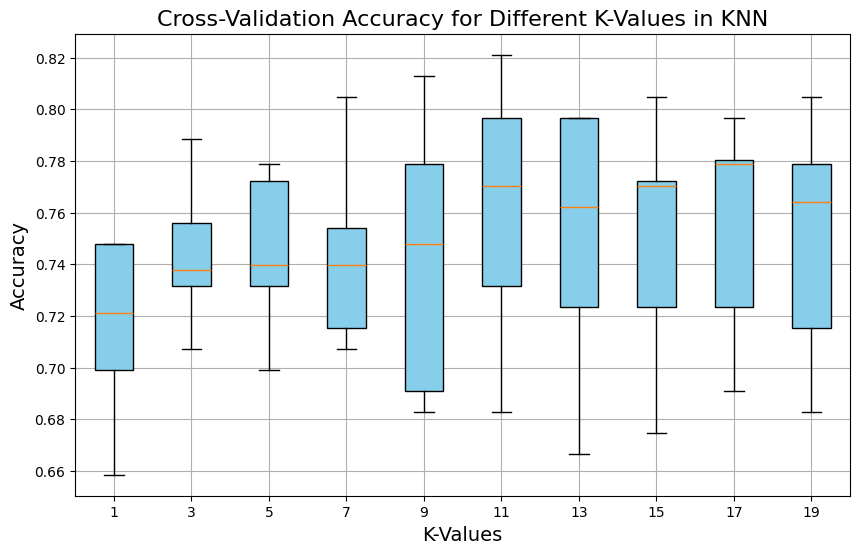

In [12]:
import matplotlib.pyplot as plt

# Plotting the boxplots to visualize the distribution of accuracy scores across K values
plt.figure(figsize=(10, 6))
plt.boxplot(list(cv_results.values()), labels=k_values, patch_artist=True, 
            boxprops=dict(facecolor='skyblue', color='black'),
            whiskerprops=dict(color='black'), flierprops=dict(markerfacecolor='r', marker='o', markersize=6))
plt.title('Cross-Validation Accuracy for Different K-Values in KNN', fontsize=16)
plt.xlabel('K-Values', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()


# Hitung Specificity

In [13]:
from sklearn.metrics import confusion_matrix

# Calculate specificity for each K value
specificity_results = {}

for k, knn in knn_models.items():
    # Predict the outcomes
    y_pred = knn.predict(X_test)
    
    # Get confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Calculate specificity
    specificity = tn / (tn + fp)
    specificity_results[k] = specificity

# Display specificity results
print("Specificity for each K:")
for k, specificity in specificity_results.items():
    print(f"K = {k}, Specificity = {specificity:.2f}")


Specificity for each K:
K = 1, Specificity = 0.68
K = 3, Specificity = 0.70
K = 5, Specificity = 0.67
K = 7, Specificity = 0.65
K = 9, Specificity = 0.64
K = 11, Specificity = 0.67
K = 13, Specificity = 0.62
K = 15, Specificity = 0.63
K = 17, Specificity = 0.64
K = 19, Specificity = 0.62


# Visualisasi Specificity

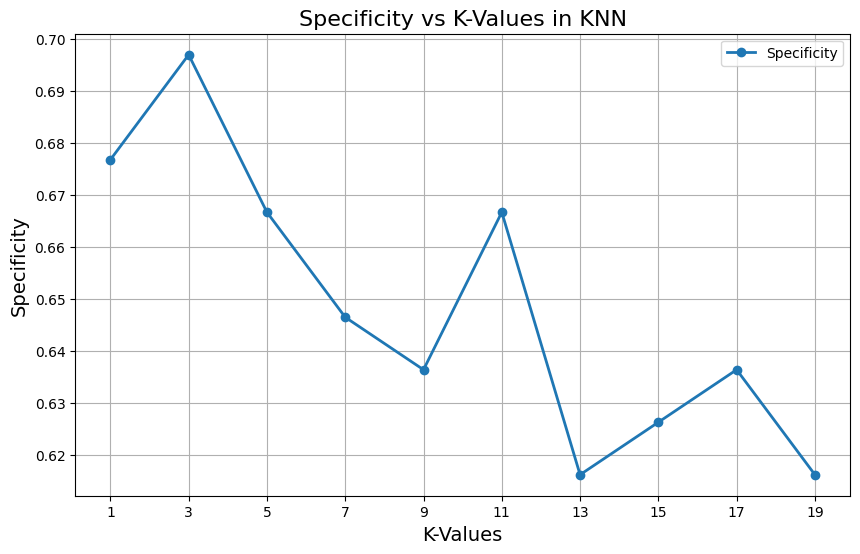

In [14]:
import matplotlib.pyplot as plt

# Visualize specificity results
k_values = list(specificity_results.keys())
specificities = list(specificity_results.values())

plt.figure(figsize=(10, 6))
plt.plot(k_values, specificities, marker='o', linestyle='-', linewidth=2, label='Specificity')
plt.title('Specificity vs K-Values in KNN', fontsize=16)
plt.xlabel('K-Values', fontsize=14)
plt.ylabel('Specificity', fontsize=14)
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()
